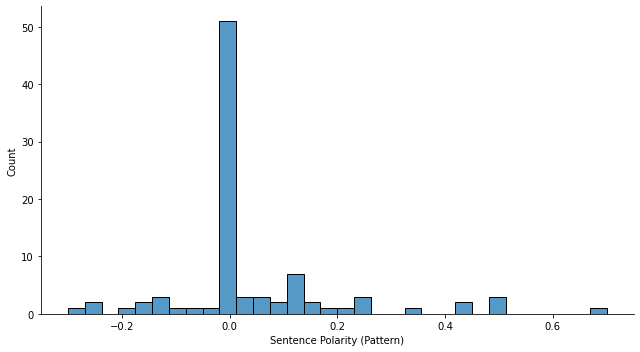

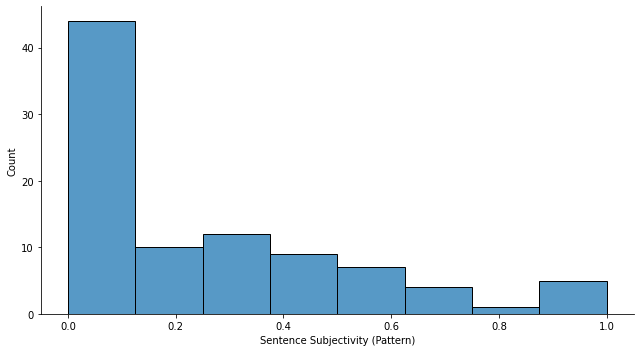

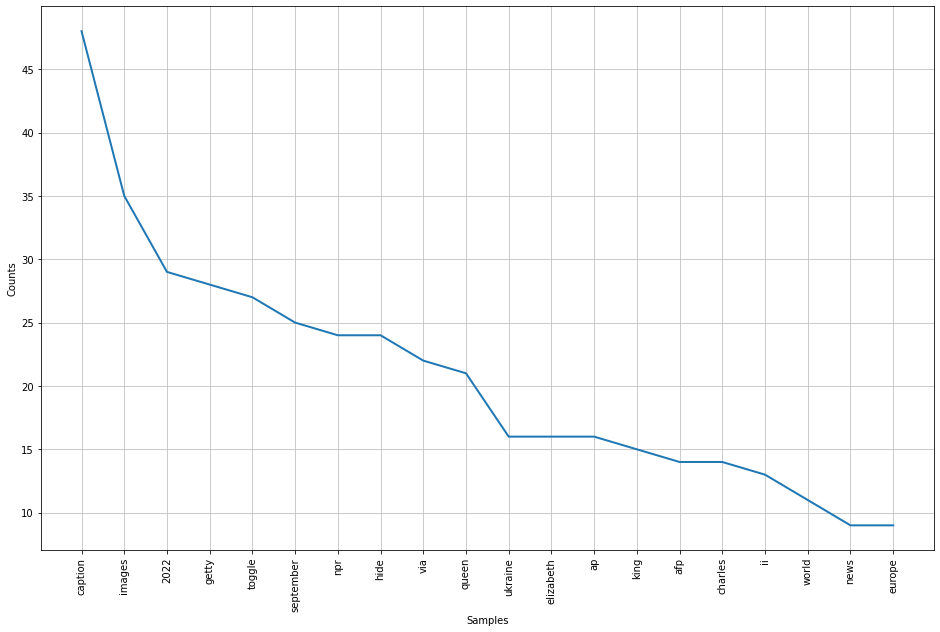

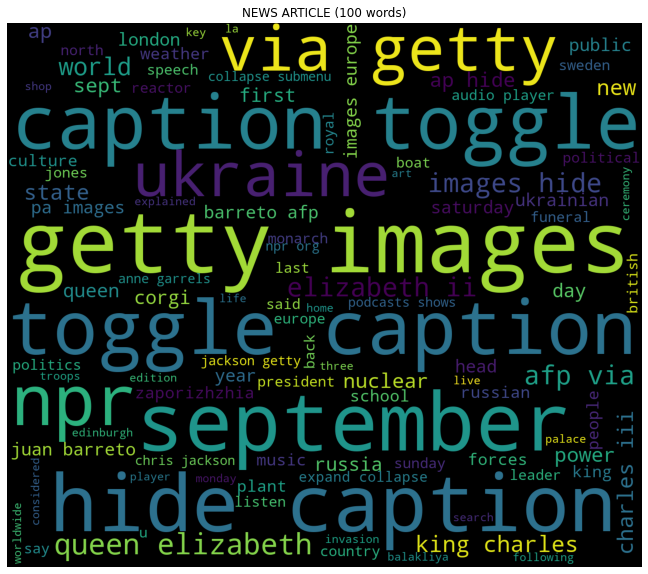

,Polarity,Subjectivity
0,0.048019,0.239994


In [4]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
#nltk.download('stopwords')
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import random
#!pip install wordcloud
from wordcloud import WordCloud
import sys
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_sm
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
from textblob import TextBlob
from pattern.en import sentiment

#r=requests.get('https://www.deccanherald.com/world-news-politics') #India
r=requests.get('https://www.npr.org/sections/world/') # US
#r=requests.get('http://en.people.cn/') # China
#r=requests.get('https://www.asahi.com/ajw/asia_world/world/') # Japan
#r=requests.get('https://www.deutschland.de/en/topic/business') # Germany
#r=requests.get('https://www.bbc.com/news/world') # UK
#r=requests.get('https://www.lefigaro.fr/international') # France
#r=requests.get('https://www.corriere.it/english/') # Italy

#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'
#Extracting the HTML from the request object
html = r.text
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()
# Cleaning the text
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "\'"])
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])
us_df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])
pattern_sentiment[1]
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.
#English stop words from nltk
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)
len(words_new)
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])
plt.subplots(figsize=(16,10))
us_wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(us_wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

# %%
us_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
us_scores = us_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
us_scores = pd.DataFrame(us_scores)
us_scores = us_scores.T
us_scores

In [ ]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
#nltk.download('stopwords')
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import random
#!pip install wordcloud
from wordcloud import WordCloud
import sys
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_sm
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
from textblob import TextBlob
from pattern.en import sentiment

#r=requests.get('https://www.deccanherald.com/world-news-politics') #India
#r=requests.get('https://www.npr.org/sections/world/') # US
r=requests.get('http://en.people.cn/') # China
#r=requests.get('https://www.asahi.com/ajw/asia_world/world/') # Japan
#r=requests.get('https://www.deutschland.de/en/topic/business') # Germany
#r=requests.get('https://www.bbc.com/news/world') # UK
#r=requests.get('https://www.lefigaro.fr/international') # France
#r=requests.get('https://www.corriere.it/english/') # Italy

#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'
#Extracting the HTML from the request object
html = r.text
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()
# Cleaning the text
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "\'"])
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])
china_df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])
pattern_sentiment[1]
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.
#English stop words from nltk
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)
len(words_new)
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])
plt.subplots(figsize=(16,10))
china_wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(us_wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

# %%
china_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
china_scores = china_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
china_scores = pd.DataFrame(china_scores)
china_scores = china_scores.T

In [ ]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
#nltk.download('stopwords')
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import random
#!pip install wordcloud
from wordcloud import WordCloud
import sys
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_sm
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
from textblob import TextBlob
from pattern.en import sentiment

#r=requests.get('https://www.deccanherald.com/world-news-politics') #India
#r=requests.get('https://www.npr.org/sections/world/') # US
#r=requests.get('http://en.people.cn/') # China
r=requests.get('https://www.asahi.com/ajw/asia_world/world/') # Japan
#r=requests.get('https://www.deutschland.de/en/topic/business') # Germany
#r=requests.get('https://www.bbc.com/news/world') # UK
#r=requests.get('https://www.lefigaro.fr/international') # France
#r=requests.get('https://www.corriere.it/english/') # Italy

#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'
#Extracting the HTML from the request object
html = r.text
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()
# Cleaning the text
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "\'"])
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])
japan_df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])
pattern_sentiment[1]
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.
#English stop words from nltk
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)
len(words_new)
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])
plt.subplots(figsize=(16,10))
japan_wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(us_wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

# %%
japan_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
japan_scores = japan_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
japan_scores = pd.DataFrame(japan_scores)
japan_scores = japan_scores.T

In [ ]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
#nltk.download('stopwords')
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import random
#!pip install wordcloud
from wordcloud import WordCloud
import sys
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_sm
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
from textblob import TextBlob
from pattern.en import sentiment

#r=requests.get('https://www.deccanherald.com/world-news-politics') #India
#r=requests.get('https://www.npr.org/sections/world/') # US
#r=requests.get('http://en.people.cn/') # China
#r=requests.get('https://www.asahi.com/ajw/asia_world/world/') # Japan
r=requests.get('https://www.deutschland.de/en/topic/business') # Germany
#r=requests.get('https://www.bbc.com/news/world') # UK
#r=requests.get('https://www.lefigaro.fr/international') # France
#r=requests.get('https://www.corriere.it/english/') # Italy

#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'
#Extracting the HTML from the request object
html = r.text
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()
# Cleaning the text
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "\'"])
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])
germany_df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])
pattern_sentiment[1]
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.
#English stop words from nltk
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)
len(words_new)
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])
plt.subplots(figsize=(16,10))
germany_wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(us_wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

# %%
germany_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
germany_scores = germany_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
germany_scores = pd.DataFrame(germany_scores)
germany_scores = germany_scores.T

In [ ]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
#nltk.download('stopwords')
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import random
#!pip install wordcloud
from wordcloud import WordCloud
import sys
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_sm
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
from textblob import TextBlob
from pattern.en import sentiment

#r=requests.get('https://www.deccanherald.com/world-news-politics') #India
#r=requests.get('https://www.npr.org/sections/world/') # US
#r=requests.get('http://en.people.cn/') # China
#r=requests.get('https://www.asahi.com/ajw/asia_world/world/') # Japan
#r=requests.get('https://www.deutschland.de/en/topic/business') # Germany
r=requests.get('https://www.bbc.com/news/world') # UK
#r=requests.get('https://www.lefigaro.fr/international') # France
#r=requests.get('https://www.corriere.it/english/') # Italy

#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'
#Extracting the HTML from the request object
html = r.text
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()
# Cleaning the text
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "\'"])
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])
uk_df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])
pattern_sentiment[1]
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.
#English stop words from nltk
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)
len(words_new)
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])
plt.subplots(figsize=(16,10))
uk_wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(us_wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

# %%
uk_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
uk_scores = uk_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
uk_scores = pd.DataFrame(uk_scores)
uk_scores = uk_scores.T

In [ ]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
#nltk.download('stopwords')
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import random
#!pip install wordcloud
from wordcloud import WordCloud
import sys
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_sm
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
from textblob import TextBlob
from pattern.en import sentiment

#r=requests.get('https://www.deccanherald.com/world-news-politics') #India
#r=requests.get('https://www.npr.org/sections/world/') # US
#r=requests.get('http://en.people.cn/') # China
#r=requests.get('https://www.asahi.com/ajw/asia_world/world/') # Japan
#r=requests.get('https://www.deutschland.de/en/topic/business') # Germany
#r=requests.get('https://www.bbc.com/news/world') # UK
r=requests.get('https://www.lefigaro.fr/international') # France
#r=requests.get('https://www.corriere.it/english/') # Italy

#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'
#Extracting the HTML from the request object
html = r.text
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()
# Cleaning the text
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "\'"])
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])
france_df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])
pattern_sentiment[1]
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.
#English stop words from nltk
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)
len(words_new)
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])
plt.subplots(figsize=(16,10))
france_wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(us_wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

# %%
france_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
france_scores = france_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
france_scores = pd.DataFrame(france_scores)
france_scores = france_scores.T

In [ ]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
#nltk.download('stopwords')
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import random
#!pip install wordcloud
from wordcloud import WordCloud
import sys
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_sm
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
from textblob import TextBlob
from pattern.en import sentiment

r=requests.get('https://www.deccanherald.com/world-news-politics') #India
#r=requests.get('https://www.npr.org/sections/world/') # US
#r=requests.get('http://en.people.cn/') # China
#r=requests.get('https://www.asahi.com/ajw/asia_world/world/') # Japan
#r=requests.get('https://www.deutschland.de/en/topic/business') # Germany
#r=requests.get('https://www.bbc.com/news/world') # UK
#r=requests.get('https://www.lefigaro.fr/international') # France
#r=requests.get('https://www.corriere.it/english/') # Italy

#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'
#Extracting the HTML from the request object
html = r.text
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()
# Cleaning the text
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "\'"])
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])
india_df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])
pattern_sentiment[1]
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.
#English stop words from nltk
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)
len(words_new)
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])
plt.subplots(figsize=(16,10))
india_wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(us_wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

# %%
india_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
india_scores = india_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
india_scores = pd.DataFrame(india_scores)
india_scores = india_scores.T

In [ ]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
#nltk.download('stopwords')
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import random
#!pip install wordcloud
from wordcloud import WordCloud
import sys
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_sm
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
from textblob import TextBlob
from pattern.en import sentiment

#r=requests.get('https://www.deccanherald.com/world-news-politics') #India
#r=requests.get('https://www.npr.org/sections/world/') # US
#r=requests.get('http://en.people.cn/') # China
#r=requests.get('https://www.asahi.com/ajw/asia_world/world/') # Japan
#r=requests.get('https://www.deutschland.de/en/topic/business') # Germany
#r=requests.get('https://www.bbc.com/news/world') # UK
#r=requests.get('https://www.lefigaro.fr/international') # France
r=requests.get('https://www.corriere.it/english/') # Italy

#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'
#Extracting the HTML from the request object
html = r.text
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()
# Cleaning the text
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "\'"])
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])
italy_df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])
pattern_sentiment[1]
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.
#English stop words from nltk
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)
len(words_new)
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])
plt.subplots(figsize=(16,10))
italy_wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(us_wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

# %%
italy_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
italy_scores = italy_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
italy_scores = pd.DataFrame(italy_scores)
italy_scores = italy_scores.T

In [ ]:
data_frames = [us_scores, china_scores, japan_scores, germany_scores, uk_scores, france_scores, india_scores, italy_scores]

In [ ]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Polarity', 'Subjectivity'],
                                            how='outer'), data_frames)

In [ ]:
pol_mean = df_merged["Polarity"].mean()
print(pol_mean)


In [ ]:
sub_mean = df_merged['Subjectivity'].mean()
print(sub_mean)